In [16]:
# Import all the required libraries
import fastf1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

In [2]:
import fastf1
import numpy
import pandas
import matplotlib
import seaborn
import xgboost
import sklearn
import streamlit

print("fastf1:", fastf1.__version__)
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", seaborn.__version__)
print("xgboost:", xgboost.__version__)
print("scikit-learn:", sklearn.__version__)
print("streamlit:", streamlit.__version__)

fastf1: 3.5.3
numpy: 1.26.4
pandas: 2.2.3
matplotlib: 3.10.0
seaborn: 0.13.2
xgboost: 3.0.0
scikit-learn: 1.6.1
streamlit: 1.37.1


In [3]:
final_df = pd.read_csv('DATA/f1_final_data.csv')
final_df

,Round,Abbreviation,GridPosition,Position,Points,DriverName,TeamId,AvgQualiPosition,AvgRacePosition,QualifyingScore
0,1,NOR,1.0,1.0,43,Lando Norris,mclaren,2.0,1.5,1.50
1,1,VER,3.0,2.0,30,Max Verstappen,red_bull,3.5,3.0,3.25
2,1,RUS,4.0,3.0,30,George Russell,mercedes,3.0,3.0,3.50
3,1,ANT,16.0,4.0,20,Kimi Antonelli,mercedes,12.0,5.0,14.00
4,1,ALB,6.0,5.0,16,Alexander Albon,williams,8.0,6.0,7.00
5,1,STR,13.0,6.0,10,Lance Stroll,aston_martin,13.5,7.5,13.25
6,1,HUL,17.0,7.0,6,Nico Hülkenberg,sauber,14.5,11.0,15.75
7,1,LEC,7.0,8.0,4,Charles Leclerc,ferrari,6.5,13.0,6.75
8,1,PIA,2.0,9.0,27,Oscar Piastri,mclaren,1.5,5.0,1.75
9,1,HAM,8.0,10.0,1,Lewis Hamilton,ferrari,6.5,14.5,7.25


In [4]:
# Select only numerical columns from final_df for visualization or modeling
df_plot = final_df.select_dtypes(include = 'number')

<Axes: >

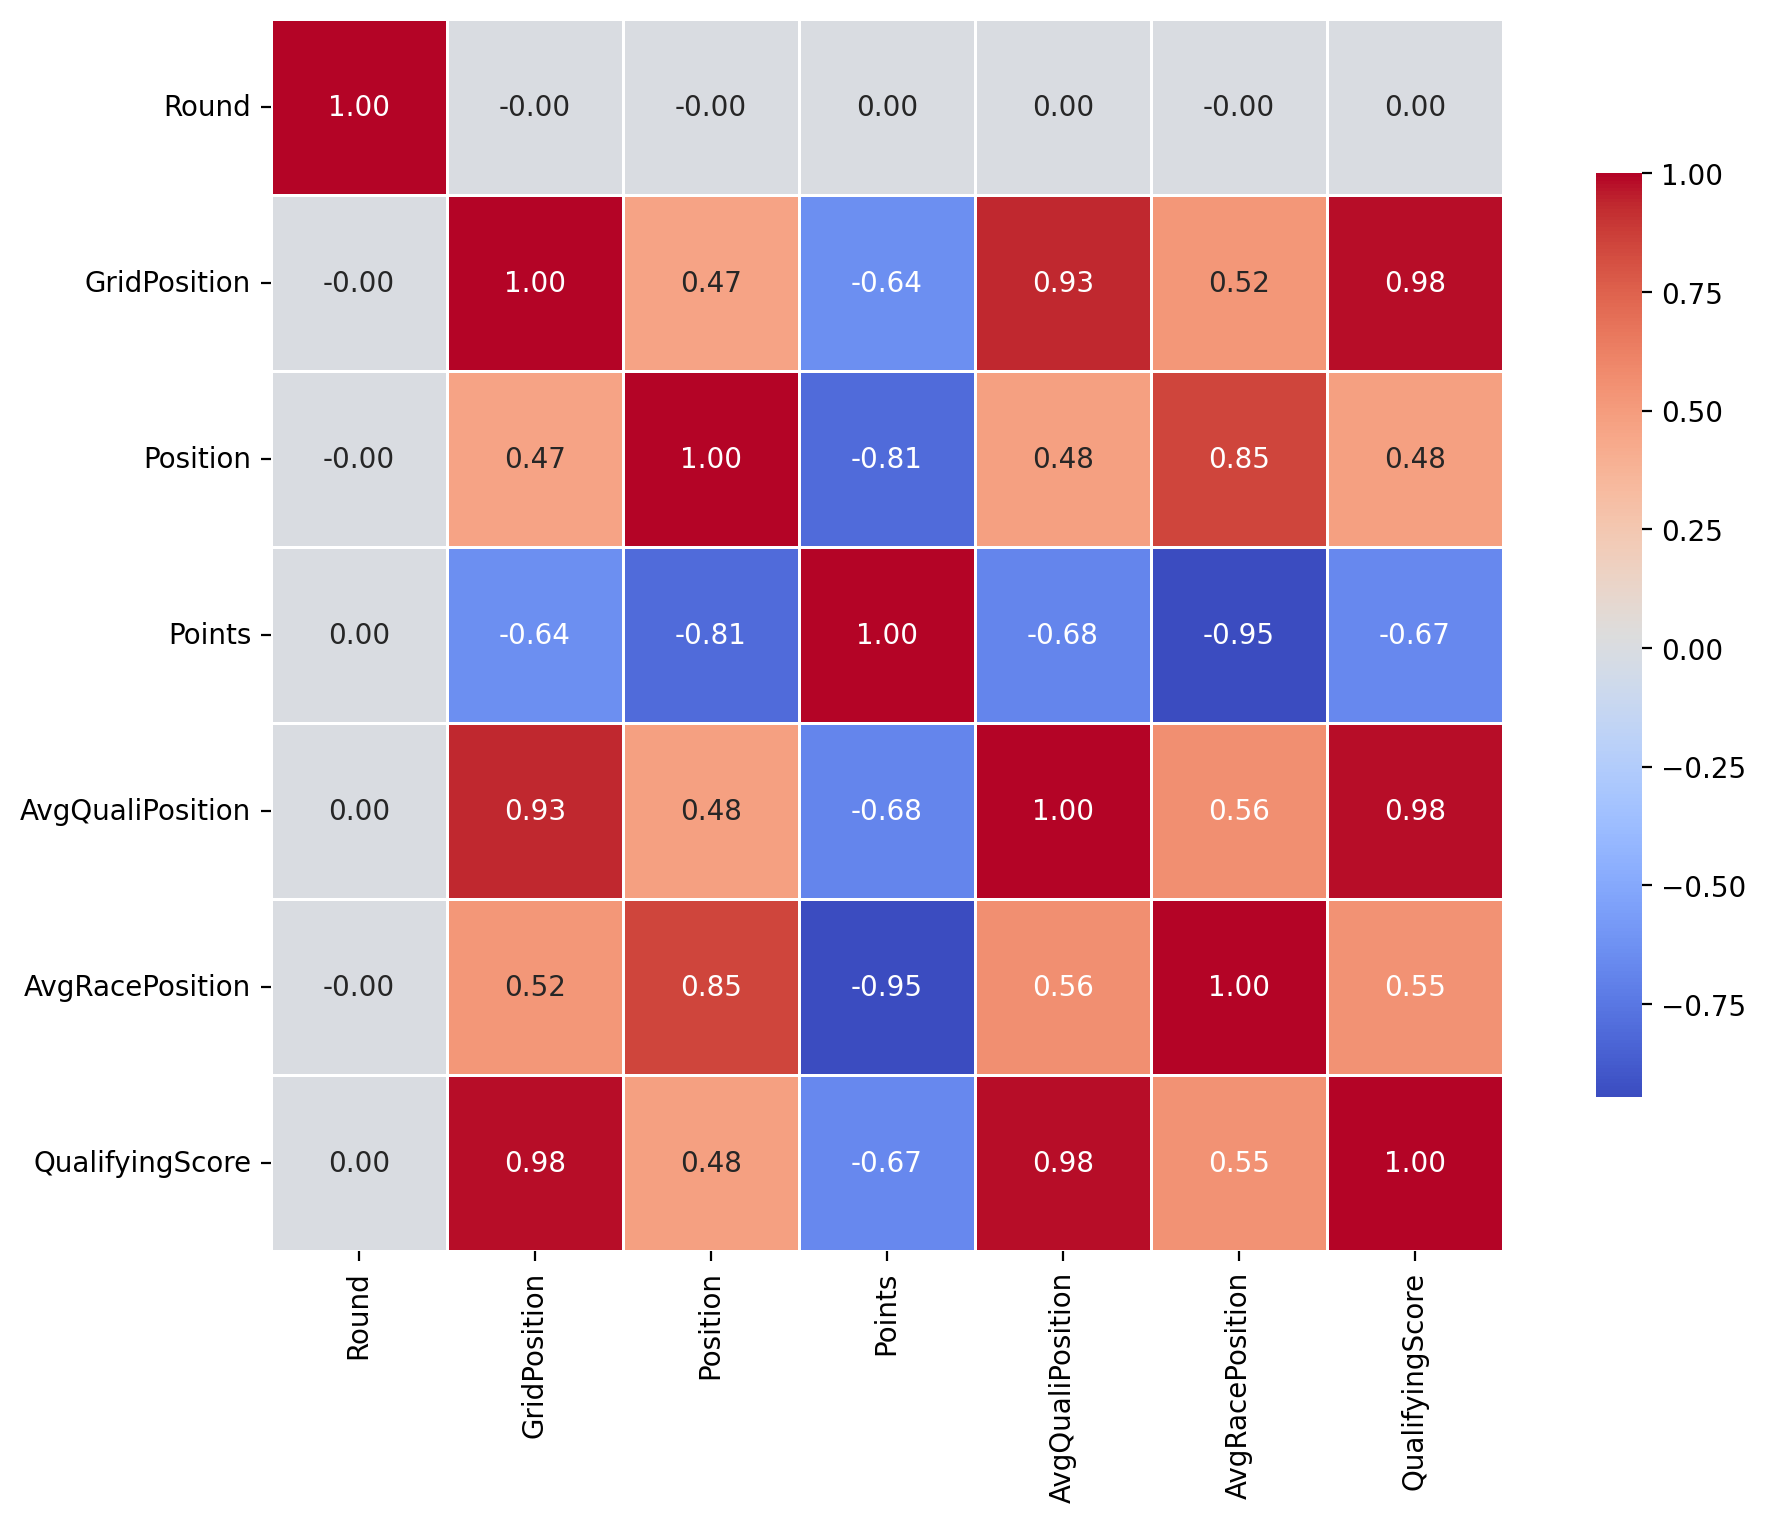

In [5]:
# Set figure size for better visibility
plt.figure(figsize=(12, 8), dpi=200)

# Create a heatmap to visualize correlations between numerical features
sns.heatmap(df_plot.corr(), annot=True, cmap="coolwarm", fmt=".2f", 
            linewidths=1, square=True, cbar_kws={"shrink": 0.75})

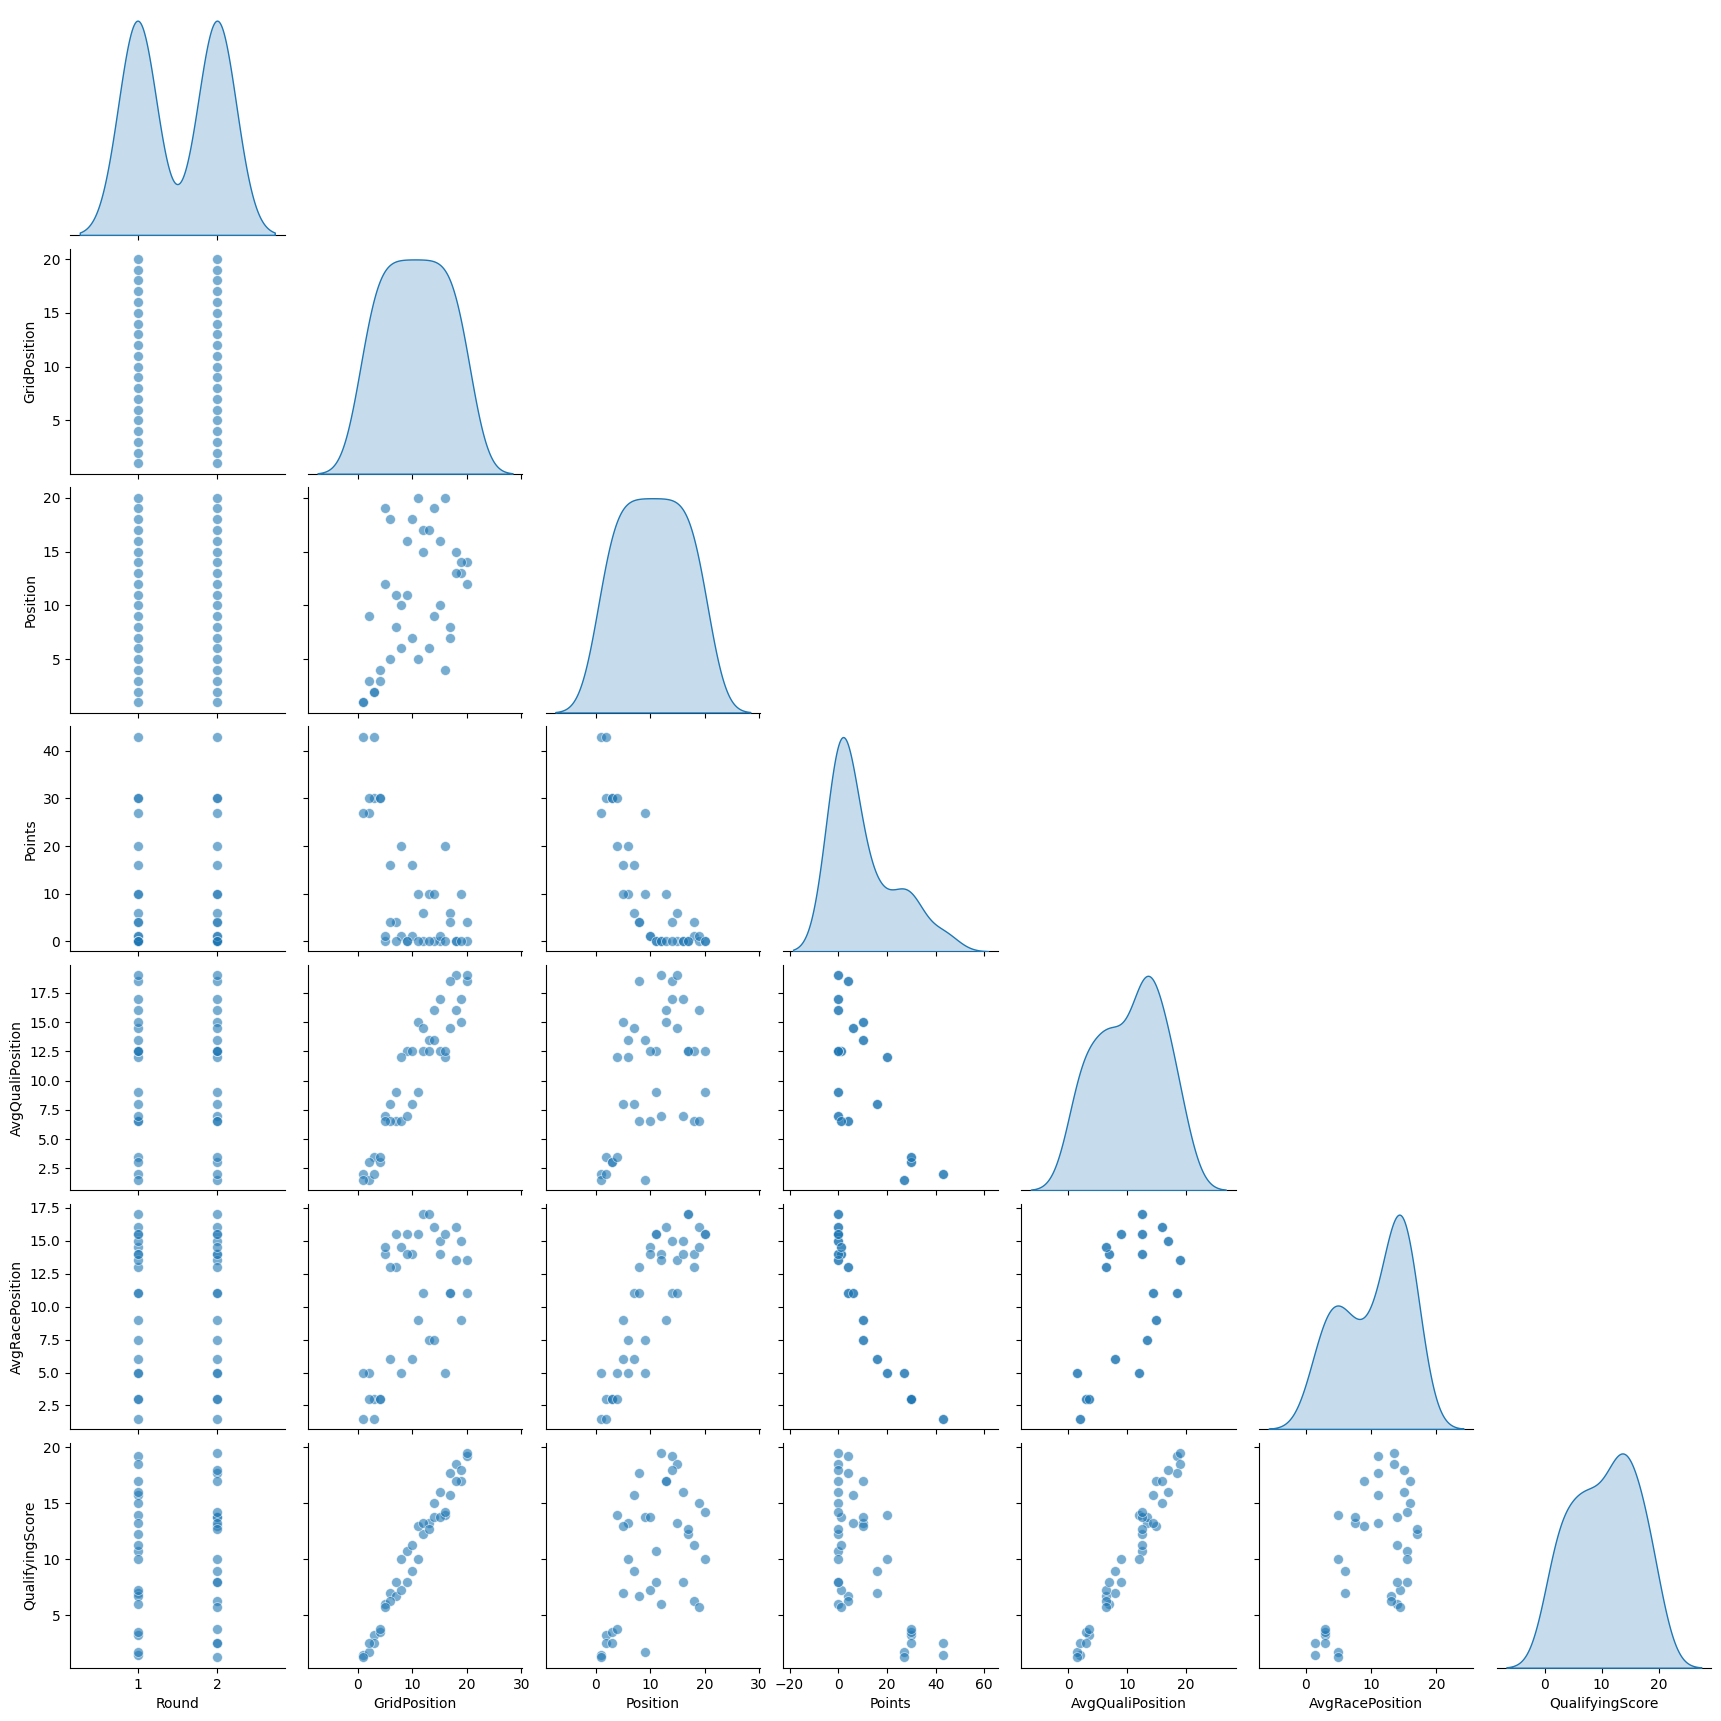

In [6]:
# Generate a pairplot to explore relationships between numerical variables
# - 'diag_kind="kde"' creates kernel density estimates on the diagonal
# - 'corner=True' avoids duplicate plots
# - 'plot_kws' adjusts the appearance of scatter plots
sns.pairplot(df_plot, diag_kind="kde", corner=True, plot_kws={'alpha': 0.6, 's': 50})
plt.show()

In [7]:
final_df = final_df.drop(['DriverName','TeamId'] ,axis=1)
final_df

,Round,Abbreviation,GridPosition,Position,Points,AvgQualiPosition,AvgRacePosition,QualifyingScore
0,1,NOR,1.0,1.0,43,2.0,1.5,1.50
1,1,VER,3.0,2.0,30,3.5,3.0,3.25
2,1,RUS,4.0,3.0,30,3.0,3.0,3.50
3,1,ANT,16.0,4.0,20,12.0,5.0,14.00
4,1,ALB,6.0,5.0,16,8.0,6.0,7.00
5,1,STR,13.0,6.0,10,13.5,7.5,13.25
6,1,HUL,17.0,7.0,6,14.5,11.0,15.75
7,1,LEC,7.0,8.0,4,6.5,13.0,6.75
8,1,PIA,2.0,9.0,27,1.5,5.0,1.75
9,1,HAM,8.0,10.0,1,6.5,14.5,7.25


In [8]:
# Create new column for tier label
def position_tier(pos):
    if pos <= 5:
        return 0  # Top Tier
    elif pos <= 10:
        return 1  # Midfield
    else:
        return 2  # Backmarker

In [9]:
# Apply to target column
final_df["PositionTier"] = final_df["Position"].apply(position_tier)
final_df

,Round,Abbreviation,GridPosition,Position,Points,AvgQualiPosition,AvgRacePosition,QualifyingScore,PositionTier
0,1,NOR,1.0,1.0,43,2.0,1.5,1.50,0
1,1,VER,3.0,2.0,30,3.5,3.0,3.25,0
2,1,RUS,4.0,3.0,30,3.0,3.0,3.50,0
3,1,ANT,16.0,4.0,20,12.0,5.0,14.00,0
4,1,ALB,6.0,5.0,16,8.0,6.0,7.00,0
5,1,STR,13.0,6.0,10,13.5,7.5,13.25,1
6,1,HUL,17.0,7.0,6,14.5,11.0,15.75,1
7,1,LEC,7.0,8.0,4,6.5,13.0,6.75,1
8,1,PIA,2.0,9.0,27,1.5,5.0,1.75,1
9,1,HAM,8.0,10.0,1,6.5,14.5,7.25,1


In [10]:
# Replace these with your actual feature columns
X = final_df.drop(columns=['Position', 'PositionTier']) 
y = final_df['PositionTier']

label_enc_driver = LabelEncoder()
X["Abbreviation"] = label_enc_driver.fit_transform(X["Abbreviation"])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train

,Round,Abbreviation,GridPosition,Points,AvgQualiPosition,AvgRacePosition,QualifyingScore
39,2,6,16.0,0,12.5,15.5,14.25
6,1,9,17.0,6,14.5,11.0,15.75
25,2,2,8.0,20,12.0,5.0,10.00
9,1,8,8.0,1,6.5,14.5,7.25
13,1,3,20.0,4,18.5,11.0,19.25
31,2,10,20.0,0,19.0,13.5,19.50
34,2,9,12.0,6,14.5,11.0,13.25
8,1,14,2.0,27,1.5,5.0,1.75
17,1,16,10.0,1,12.5,14.0,11.25
24,2,13,11.0,10,15.0,9.0,13.00


In [20]:
feature_columns = X_train.columns.tolist()
joblib.dump(feature_columns, "feature_columns.pkl")

['feature_columns.pkl']

In [22]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save it
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [23]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
gbr = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 3, 5]
}

grid = GridSearchCV(gbr, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_scaled, y)

best_gbr = grid.best_estimator_

In [25]:
# Define base estimators
estimators = [
    ('ridge', Ridge(alpha=1.0)),
    ('lasso', Lasso(alpha=0.01)),
    ('xgb', XGBRegressor(n_estimators=200, verbosity=0)),
    ('gbr', best_gbr)  # use the best tuned GBR
]

# Define stacking regressor
stack = StackingRegressor(estimators=estimators, final_estimator=Ridge())

# Split again for stacking
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit and evaluate
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)

In [26]:
print(f"Stacking R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

Stacking R2 Score: 0.5092
MAE: 0.39
RMSE: 0.50


In [28]:
joblib.dump(stack, "f1_race_predictor_model.pkl")

['f1_race_predictor_model.pkl']